In [1]:
import numpy as np

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [4]:
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [5]:
# loading the data from csv file to Pandas DataFrame
data = pd.read_csv('preprocessing_hr_tcs.csv')

In [6]:
data

,Unnamed: 0,capital-gain,capital-loss,hours-per-week,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,salary
0,0,0.148453,-0.21666,-0.035429,0.030671,6,9,13,4,0,1,4,1,38,<=50K
1,1,-0.145920,-0.21666,-2.222153,0.837109,5,9,13,2,3,0,4,1,38,<=50K
2,2,-0.145920,-0.21666,-0.035429,-0.042642,3,11,9,0,5,1,4,1,38,<=50K
3,3,-0.145920,-0.21666,-0.035429,1.057047,3,1,7,2,5,0,2,1,38,<=50K
4,4,-0.145920,-0.21666,-0.035429,-0.775768,3,9,13,2,9,5,2,0,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,32556,-0.145920,-0.21666,-0.197409,-0.849080,3,7,12,2,12,5,4,0,38,<=50K
32557,32557,-0.145920,-0.21666,-0.035429,0.103983,3,11,9,2,6,0,4,1,38,>50K
32558,32558,-0.145920,-0.21666,-0.035429,1.423610,3,11,9,6,0,4,4,0,38,<=50K
32559,32559,-0.145920,-0.21666,-1.655225,-1.215643,3,11,9,4,0,3,4,1,38,<=50K


In [7]:
data=data.drop(['Unnamed: 0'] ,axis=1 )

In [8]:
data

,capital-gain,capital-loss,hours-per-week,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,native-country,salary
0,0.148453,-0.21666,-0.035429,0.030671,6,9,13,4,0,1,4,1,38,<=50K
1,-0.145920,-0.21666,-2.222153,0.837109,5,9,13,2,3,0,4,1,38,<=50K
2,-0.145920,-0.21666,-0.035429,-0.042642,3,11,9,0,5,1,4,1,38,<=50K
3,-0.145920,-0.21666,-0.035429,1.057047,3,1,7,2,5,0,2,1,38,<=50K
4,-0.145920,-0.21666,-0.035429,-0.775768,3,9,13,2,9,5,2,0,4,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,-0.145920,-0.21666,-0.197409,-0.849080,3,7,12,2,12,5,4,0,38,<=50K
32557,-0.145920,-0.21666,-0.035429,0.103983,3,11,9,2,6,0,4,1,38,>50K
32558,-0.145920,-0.21666,-0.035429,1.423610,3,11,9,6,0,4,4,0,38,<=50K
32559,-0.145920,-0.21666,-1.655225,-1.215643,3,11,9,4,0,3,4,1,38,<=50K


# Model building

In [9]:
X=data.drop('salary',axis=1)
y=data['salary']

In [10]:
from sklearn.model_selection import train_test_split

In [11]:
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.2)

# Logistic Regression

In [12]:
from sklearn.linear_model import LogisticRegression,Lasso
log_reg = LogisticRegression()
log_reg_model = log_reg.fit(X_train,y_train)
log_pred = log_reg_model.predict(X_test)

In [13]:
from sklearn.metrics import classification_report
print(classification_report(y_test,log_pred))

              precision    recall  f1-score   support

       <=50K       0.85      0.94      0.89      4942
        >50K       0.71      0.46      0.56      1571

    accuracy                           0.83      6513
   macro avg       0.78      0.70      0.73      6513
weighted avg       0.81      0.83      0.81      6513



In [14]:
# now import accuracy matrices
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score,f1_score

In [15]:
print('Accuracy Score=',accuracy_score(y_test,log_pred))
print('F1 Score <=50k=',f1_score(y_test,log_pred,pos_label='<=50K'))
print('F1 Score >50k =',f1_score(y_test,log_pred,pos_label='>50K'))

Accuracy Score= 0.8258866881621373
F1 Score <=50k= 0.891337677270985
F1 Score >50k = 0.5621621621621622


<AxesSubplot:>

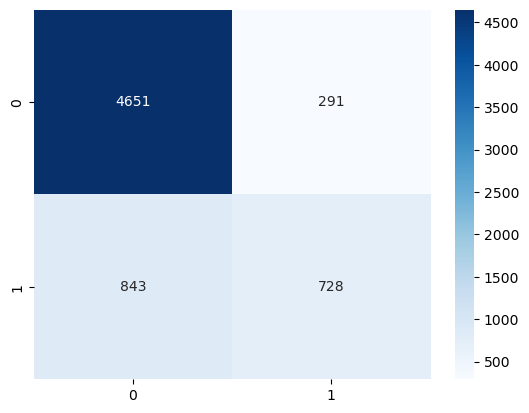

In [16]:
sns.heatmap(confusion_matrix (y_test,log_pred),annot=True,fmt='d',cmap='Blues')

# Decision Tree Classifier

In [17]:
from sklearn.tree import DecisionTreeClassifier

In [18]:
clf_dt=DecisionTreeClassifier()
clf_dt = clf_dt.fit(X_train, y_train)
y_pred_dt = clf_dt.predict(X_test)

In [19]:
print(classification_report(y_test,y_pred_dt))

              precision    recall  f1-score   support

       <=50K       0.88      0.88      0.88      4942
        >50K       0.63      0.63      0.63      1571

    accuracy                           0.82      6513
   macro avg       0.76      0.76      0.76      6513
weighted avg       0.82      0.82      0.82      6513



In [20]:
print('Accuracy Score=',accuracy_score(y_test,y_pred_dt))
print('F1 Score <=50k=',f1_score(y_test,y_pred_dt,pos_label='<=50K'))
print('F1 Score >50k =',f1_score(y_test,y_pred_dt,pos_label='>50K'))

Accuracy Score= 0.8206663595885153
F1 Score <=50k= 0.8816136225420637
F1 Score >50k = 0.630379746835443


<AxesSubplot:>

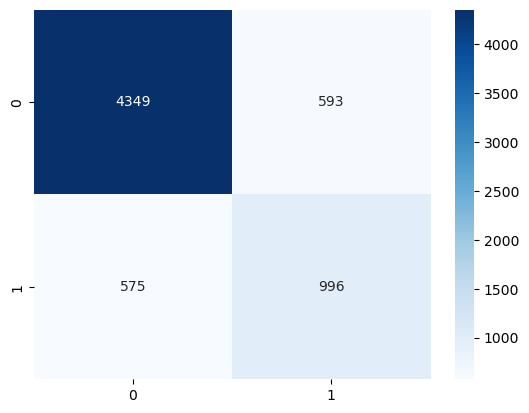

In [21]:
sns.heatmap(confusion_matrix (y_test,y_pred_dt),annot=True,fmt='d',cmap='Blues')

# Random Forest Classifier

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf_rf = RandomForestClassifier()
clf_rf = clf_rf.fit(X_train, y_train)
y_pred_rf = clf_rf.predict(X_test)

In [24]:
print(classification_report(y_test,y_pred_rf))

              precision    recall  f1-score   support

       <=50K       0.89      0.92      0.90      4942
        >50K       0.72      0.64      0.67      1571

    accuracy                           0.85      6513
   macro avg       0.80      0.78      0.79      6513
weighted avg       0.85      0.85      0.85      6513



In [25]:
print('Accuracy Score=',accuracy_score(y_test,y_pred_rf))
print('F1 Score <=50k=',f1_score(y_test,y_pred_rf,pos_label='<=50K'))
print('F1 Score >50k =',f1_score(y_test,y_pred_rf,pos_label='>50K'))

Accuracy Score= 0.8518347919545525
F1 Score <=50k= 0.9041231992051665
F1 Score >50k = 0.674096588990206


<AxesSubplot:>

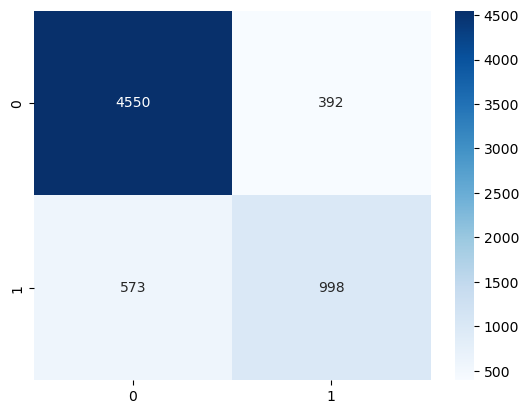

In [26]:
sns.heatmap(confusion_matrix (y_test,y_pred_rf),annot=True,fmt='d',cmap='Blues')

# Knn Model

In [27]:
from sklearn.neighbors import KNeighborsClassifier

In [28]:
metric_k=[]
neighbors=range(3,18)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_KNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)

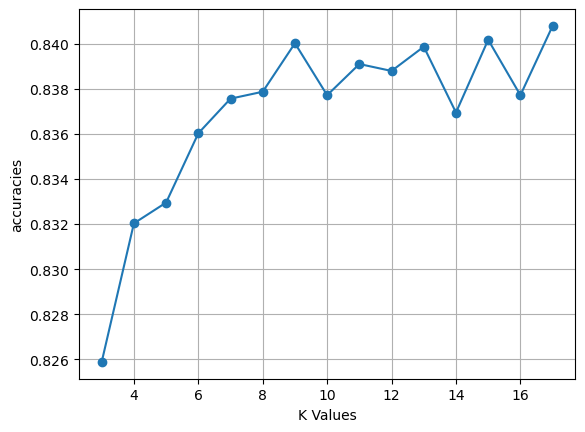

In [29]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('K Values')
plt.ylabel('accuracies')
plt.grid()

In [30]:
classifier=KNeighborsClassifier(n_neighbors=17)
classifier=classifier.fit(X_train,y_train)
y_pred_KNN=classifier.predict(X_test)
acc=accuracy_score(y_test,y_pred_KNN)

In [31]:
print('Accuracy Score=',accuracy_score(y_test,y_pred_KNN))
print('F1 Score =',f1_score(y_test,y_pred_KNN,pos_label='<=50K'))
print('F1 Score =',f1_score(y_test,y_pred_KNN,pos_label='>50K'))

Accuracy Score= 0.8407799785045295
F1 Score = 0.8979832759468767
F1 Score = 0.6375393219154142


Random forest model is the best model

<AxesSubplot:>

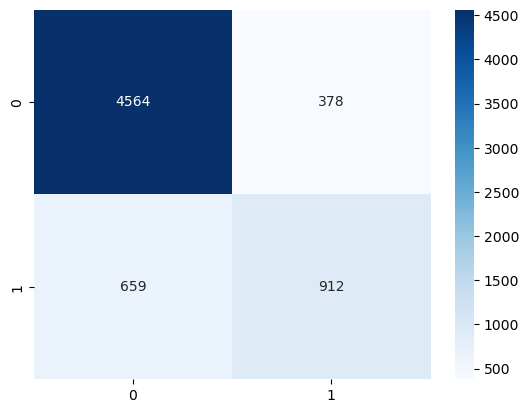

In [32]:
sns.heatmap(confusion_matrix (y_test,y_pred_KNN),annot=True,fmt='d',cmap='Blues')

In [33]:
print(classification_report(y_test,y_pred_KNN))

              precision    recall  f1-score   support

       <=50K       0.87      0.92      0.90      4942
        >50K       0.71      0.58      0.64      1571

    accuracy                           0.84      6513
   macro avg       0.79      0.75      0.77      6513
weighted avg       0.83      0.84      0.84      6513



In [34]:
#SVM linear
from sklearn.svm import SVC

In [35]:
svm_clf=SVC(kernel='linear')
svm_model=svm_clf.fit(X_train,y_train)
svm_pred=svm_model.predict(X_test)

In [36]:
print(classification_report(y_test,svm_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.97      0.89      4942
        >50K       0.80      0.33      0.46      1571

    accuracy                           0.82      6513
   macro avg       0.81      0.65      0.68      6513
weighted avg       0.82      0.82      0.79      6513



In [37]:
##SVM rbf
svm_clf=SVC(kernel='rbf')
svmr_model=svm_clf.fit(X_train,y_train)
svmr_pred=svmr_model.predict(X_test)

In [38]:
print(classification_report(y_test,svmr_pred))

              precision    recall  f1-score   support

       <=50K       0.82      0.98      0.89      4942
        >50K       0.83      0.31      0.46      1571

    accuracy                           0.82      6513
   macro avg       0.83      0.65      0.67      6513
weighted avg       0.82      0.82      0.79      6513

